In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')

import json


In [94]:
filename = '../data/PDBfam.txt'

In [95]:
# opening the file
file_obj = open(filename, "r")

In [96]:
df_PDBfam = pd.read_csv(filename, delimiter='	', low_memory=False)
df = df_PDBfam.copy()
df_PDBfam.to_csv('../data/df_PDBfam_raw.csv', index=False)
df.head()

,PdbID,DomainID,AsymChain,AuthChain,EntityID,Pfam_Acc,Pfam_ID,Description,SeqStart,SeqEnd,...,Evalue,SeqAlignment,HmmAlignment,Source,IsStructUpdated,IsWeak,Clan_ID,Clan_Acc,UniprotID,UniprotCode
0,101m,1,A,A,1,PF00042,Globin,Globin,1,113,...,1.100000e-32,EWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRVKHLKT...,dkalvkaswekvkanaeelgaeilkrlFkaypdtkklFkkfgdlss...,pdbpercent,0,0,Globin,CL0090,MYG_PHYCD,P02185
1,102l,1,A,A,1,PF00959,Phage_lysozyme,Phage lysozyme,24,149,...,1.800000e-25,YYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFN...,ywtigiG...ekgkdvs.phkr.............itkeeaagrye...,unp,0,0,Lysozyme,CL0037,-,-
2,103l,1,A,A,1,PF00959,Phage_lysozyme,Phage lysozyme,24,151,...,1.800000e-25,YYTIGIGHLLTKSPSLNSLDAAKSELDKAIGRNTNGVITKDEAEKL...,ywtigiG...ekgkdvs...phkr.............itkeeaagr...,unp,0,0,Lysozyme,CL0037,-,-
3,104l,1,A,A,1,PF00959,Phage_lysozyme,Phage lysozyme,24,150,...,1.800000e-25,YYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLF...,ywtigiG...ekgkdvsphkr...............itkeeaagry...,unp,0,0,Lysozyme,CL0037,-,-
4,104l,2,B,B,1,PF00959,Phage_lysozyme,Phage lysozyme,24,150,...,1.800000e-25,YYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLF...,ywtigiG...ekgkdvsphkr...............itkeeaagry...,unp,0,0,Lysozyme,CL0037,-,-


In [97]:
df.shape

(1042647, 29)

In [98]:
df.drop(columns=[
      'AuthChain'
    , 'SeqStart'
    , 'SeqEnd'
    , 'AlignStart'
    , 'AlignEnd'
    , 'HmmStart'
    , 'HmmEnd'
    , 'PdbSeqStart'
    , 'PdbSeqEnd'
    , 'PdbAlignStart'
    , 'PdbAlignEnd'
    , 'BitScore'
    , 'Evalue'
    , 'SeqAlignment'
    , 'HmmAlignment'
    , 'Source'
    , 'IsStructUpdated'
], inplace=True)
df.head()

,PdbID,DomainID,AsymChain,EntityID,Pfam_Acc,Pfam_ID,Description,IsWeak,Clan_ID,Clan_Acc,UniprotID,UniprotCode
0,101m,1,A,1,PF00042,Globin,Globin,0,Globin,CL0090,MYG_PHYCD,P02185
1,102l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
2,103l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
3,104l,1,A,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-
4,104l,2,B,1,PF00959,Phage_lysozyme,Phage lysozyme,0,Lysozyme,CL0037,-,-


In [92]:
df.to_csv('./../data/df_pfam_codes.csv', index=False)

In [55]:
df.nunique()

PdbID          186544
DomainID         2712
AsymChain        1633
EntityID          113
Pfam_Acc        10889
Pfam_ID         10889
Description     11517
IsWeak              2
Clan_ID           615
Clan_Acc          615
UniprotID       57838
UniprotCode     57515
dtype: int64

In [57]:
df['Pfam_ID'].value_counts().tail(30)

CPSF73-100_C       1
Symplekin_C        1
Ornatin            1
SmAKAP             1
DUF1944            1
VGLL4              1
DUF3417            1
Ada3               1
YaiA               1
zf-met2            1
DUF4844            1
Leader_CPA1        1
Suppressor_APC     1
YajC               1
DUF3443            1
MetOD2             1
DUF4848            1
SIX1_SD            1
DUF4443            1
RD3                1
Phage_Cox          1
MmcB-like          1
RFXA_RFXANK_bdg    1
Atypical_Card      1
RGS12_us1          1
SBP56              1
Myticin-prepro     1
GHL6               1
DUF2540            1
FliC_SP            1
Name: Pfam_ID, dtype: int64

In [16]:
df['Clan_ID'].value_counts()

-                  306493
Ig                  54136
P-loop_NTPase       27849
Beta_propeller      27314
NADP_Rossmann       25105
TPR                 23796
NTN                 20238
HTH                 15139
E-set               12854
PKinase             12340
OB                  11001
TIM_barrel           9506
Concanavalin         8498
Nucleoplasmin        8197
Viral_Gag            7531
LRR                  7193
Zn_Beta_Ribbon       7142
Ion_channel          7058
Globin               7016
KOW                  6927
Glyco_hydro_tim      6567
EF_hand              6453
Thioredoxin          6156
Peptidase_PA         5913
Histone              5793
Name: Clan_ID, dtype: int64

In [64]:
df_unassigned = df_PDBfam[df_PDBfam['Clan_ID']=='-']
df_unassigned = df_unassigned[['Clan_ID', 'Pfam_ID', 'SeqAlignment', 'AlignStart', 'AlignEnd']]
df_unassigned['len_seq'] = df_unassigned['SeqAlignment'].str.len()
df_unassigned['len_align'] = df_unassigned['AlignEnd'] - df_unassigned['AlignStart']

In [65]:
df_unassigned.head(20)

,Clan_ID,Pfam_ID,SeqAlignment,AlignStart,AlignEnd,len_seq,len_align
21,-,Pyrophosphatase,MVVEIPRWTNAKLEITKEETLNPIIQDTKKGKLRFVRNCFPHHGYI...,45,227,184,182
22,-,Pyrophosphatase,MVVEIPRWTNAKLEITKEETLNPIIQDTKKGKLRFVRNCFPHHGYI...,45,227,184,182
27,-,RnaseA,SAAAKFERQHMDSGNSPSSSSNYCNLMMXXRKMTQGKCKPVNTFVH...,3,121,122,118
28,-,RnaseA,SAAAKFERQHMDSGNSPSSSSNYCNLMMXXRKMTQGKCKPVNTFVH...,3,121,122,118
29,-,RnaseA,SAAAKFERQHMDSGNSPSSSSNYCNLMMXXRKMTQGKCKPVNTFVH...,3,121,122,118
30,-,RnaseA,SAAAKFERQHMDSGNSPSSSSNYCNLMMXXRKMTQGKCKPVNTFVH...,3,121,122,118
46,-,Carb_anhydrase,NGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVS-YDQA-...,11,259,255,248
73,-,PGK,INECDLKGKKVLIRVDFNVPVKN-GKITNDYRIRSALPTLKKVLTE...,5,404,403,399
74,-,PGK,INECDLKGKKVLIRVDFNVPVKN-GKITNDYRIRSALPTLKKVLTE...,5,404,403,399
75,-,PGK,INECDLKGKKVLIRVDFNVPVKN-GKITNDYRIRSALPTLKKVLTE...,5,404,403,399


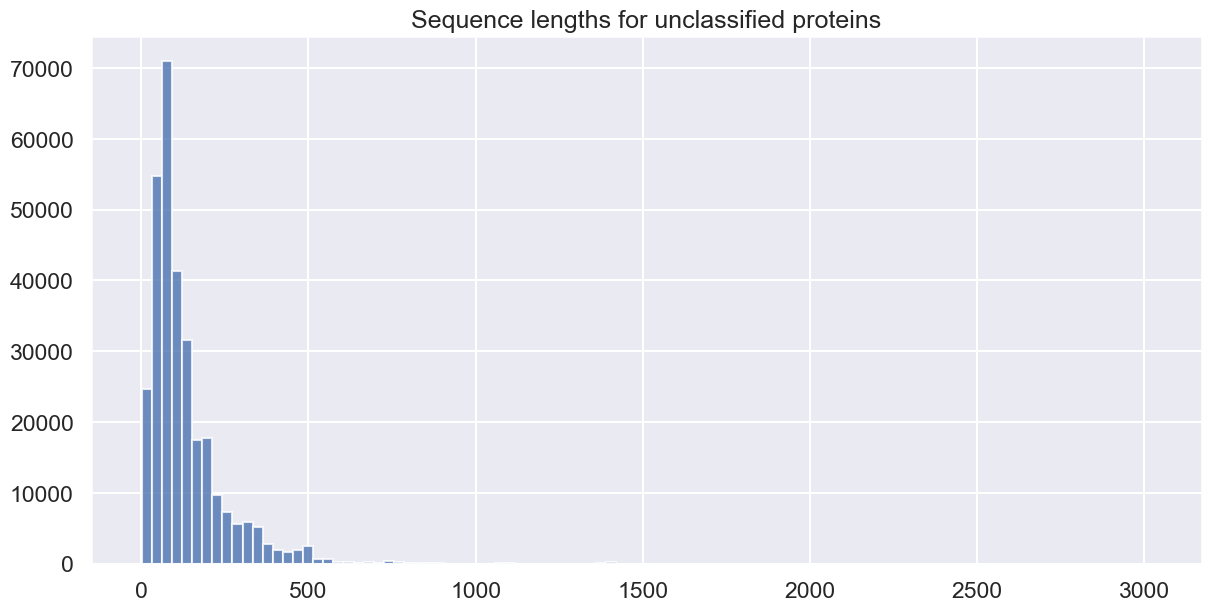

In [84]:
x = df_unassigned['len_seq']

plt.figure(figsize=(12,6), facecolor='white', layout='constrained')
plt.hist(x, bins=100, alpha=0.8)

plt.title('Sequence lengths for unclassified proteins')
plt.show()

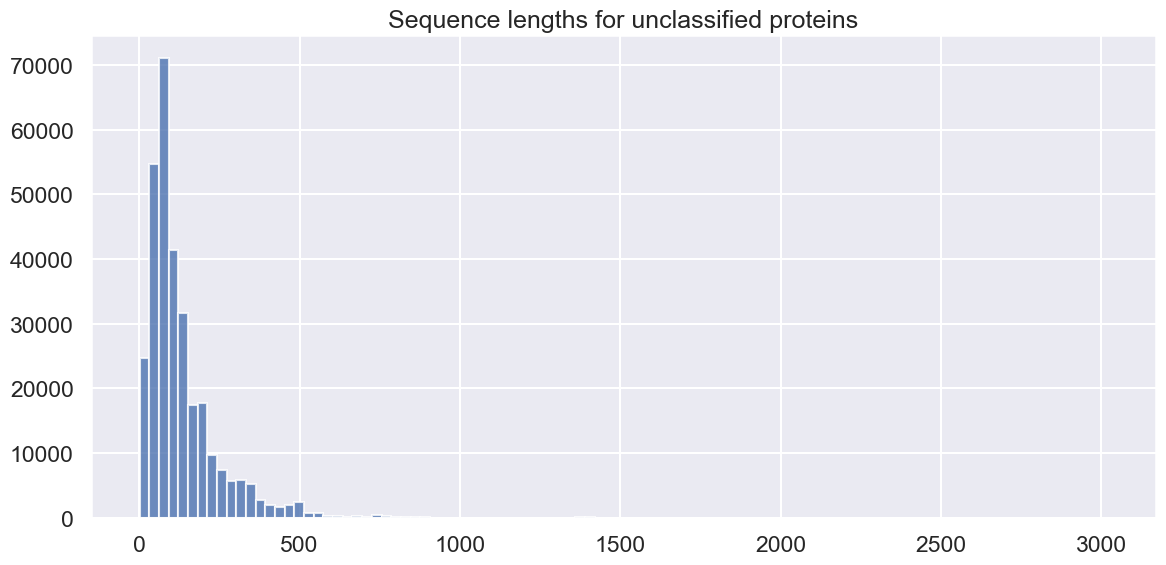

In [91]:
x = df_unassigned['len_seq']

plt.figure(figsize=(12,6), facecolor='white', layout='tight')
plt.hist(x, bins=100, alpha=0.8)

plt.title('Sequence lengths for unclassified proteins')
plt.show()

In [90]:
list(df['Clan_ID'].unique())[:15]

['Globin',
 'Lysozyme',
 'Thioredoxin',
 'GST_C',
 'NADP_Rossmann',
 '-',
 'tRNA_synt_II',
 'P-loop_NTPase',
 'Ig',
 'Cytochrome-c',
 'SRP9_14',
 'Multiheme_cytos',
 'bZIP',
 'P53-like',
 'E-set']

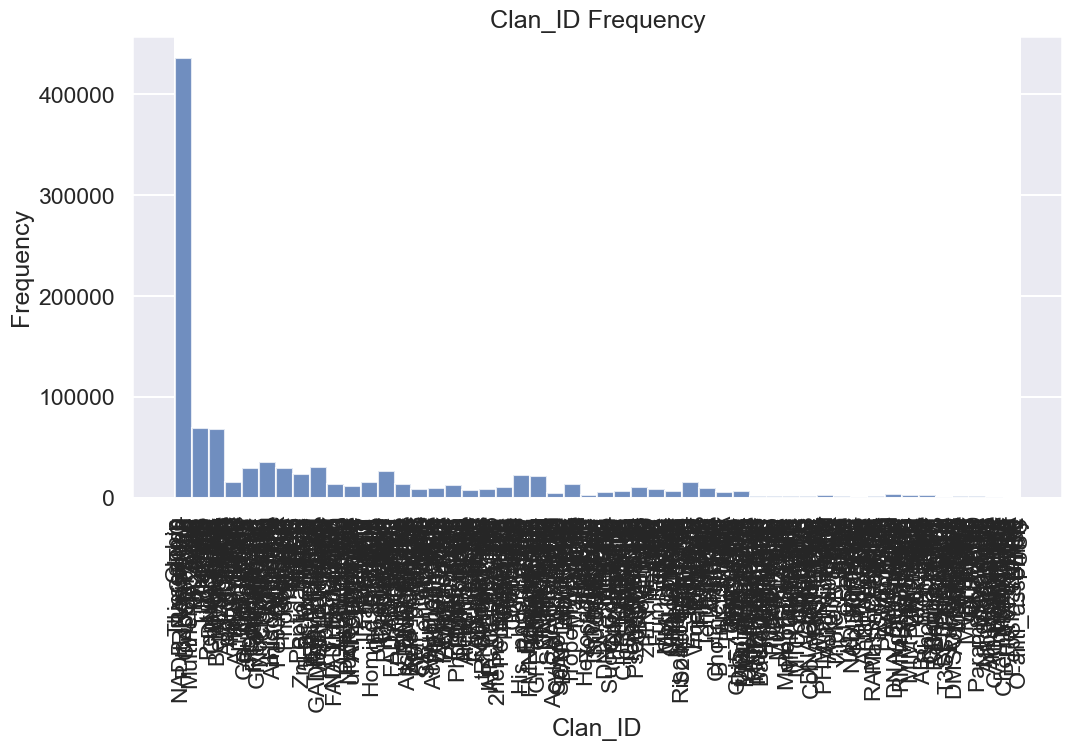

In [86]:
x = df['Clan_ID']
# x = (list(x.index), list(x.values))

plt.figure(figsize=(12,6))
# plt.hist(x, bins=30, alpha=0.4, label="bins=30", color= ('green', 'blue'))
plt.hist(x, bins=50, alpha=0.8)

plt.xlabel('Clan_ID')
plt.ylabel('Frequency')
plt.title('Clan_ID Frequency')
# plt.legend(loc='upper right')
# plt.xticks(rotation = 90)
plt.grid(True)
plt.show()


In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


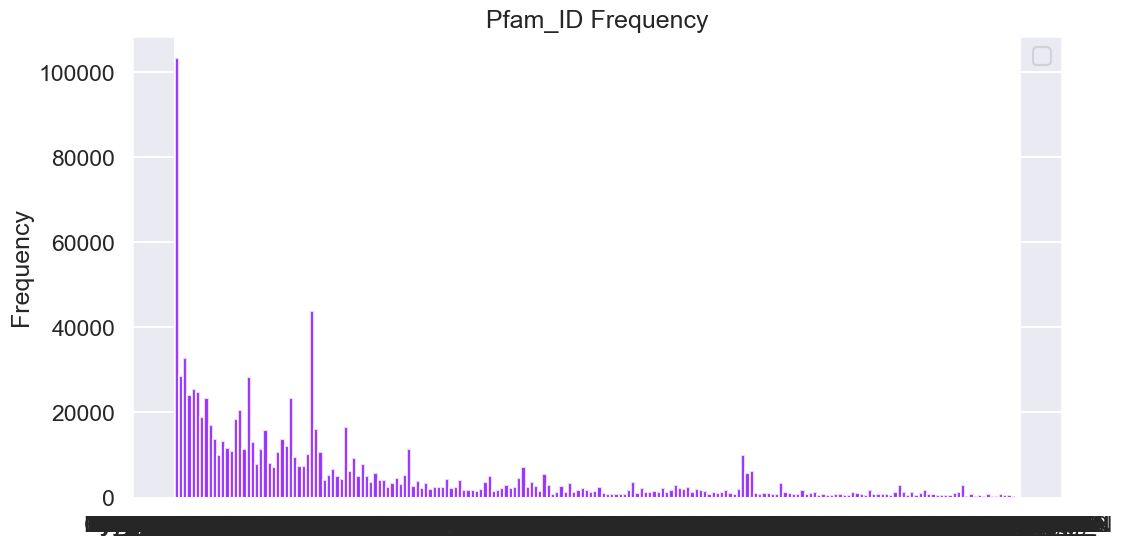

In [89]:
x = df['Pfam_ID']
# x = (list(x.index), list(x.values))
color = plt.cm.rainbow(np.linspace(0, 1,1))

plt.figure(figsize=(12,6))
# plt.hist(x, bins=100, alpha=0.8, color= ('green', 'blue'))
plt.hist(x, bins=200, alpha=0.8, color= color)

# plt.xlabel('Pfam_ID', size=12)
plt.xlabel(None)
plt.ylabel('Frequency')
plt.title('Pfam_ID Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
